In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/battery data/nasa dataset/B05_discharge_soh.csv')

# Display the first few rows of the dataset
data.head()


,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage,time,capacity,cycle,SOH
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487,1,0.928244
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487,1,0.928244
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487,1,0.928244
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487,1,0.928244
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487,1,0.928244


In [8]:
data = data.drop(columns=['time','capacity','cycle','SOH'])

In [9]:
# Display the first few rows of the dataset
data.head()

,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage
0,4.191492,-0.004902,24.330034,-0.0006,0.000
1,4.190749,-0.001478,24.325993,-0.0006,4.206
2,3.974871,-2.012528,24.389085,-1.9982,3.062
3,3.951717,-2.013979,24.544752,-1.9982,3.030
4,3.934352,-2.011144,24.731385,-1.9982,3.011


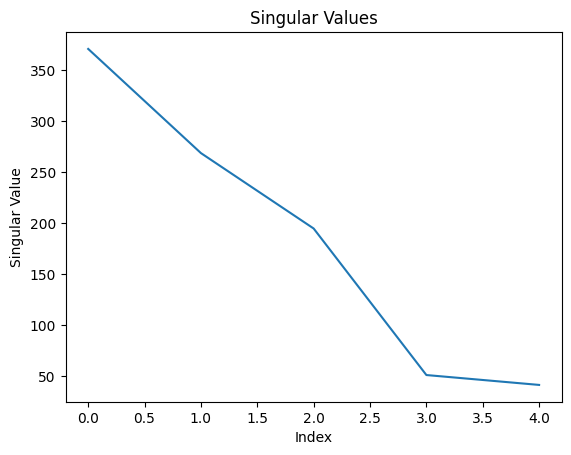

Frobenius Norm of Difference: 65.27828137902875


In [13]:

# Standardize the features (optional but recommended for SVD)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform SVD
U, Sigma, VT = np.linalg.svd(data_scaled, full_matrices=False)

# Plot singular values to help choose k
plt.plot(Sigma)
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('Singular Values')
plt.show()



In [14]:

# Choose the rank k (e.g., k=3)
k = 3

# Construct the low-rank approximation
U_k = U[:, :k]
Sigma_k = np.diag(Sigma[:k])
VT_k = VT[:k, :]

data_approx = np.dot(U_k, np.dot(Sigma_k, VT_k))

# Inverse transform to get back to original scale
data_approx_original_scale = scaler.inverse_transform(data_approx)

# Convert the approximated data back to a DataFrame
data_approx_df = pd.DataFrame(data_approx_original_scale, columns=data.columns)

# Display the first few rows of the approximated dataset
data_approx_df.head()

,terminal_voltage,terminal_current,temperature,charge_current,charge_voltage
0,4.207785,0.298257,25.421893,0.033552,0.488235
1,4.241440,-1.218646,22.294577,-0.105589,2.378739
2,4.002790,-1.999840,24.986628,-1.989233,3.113631
3,3.985456,-1.998094,25.268232,-1.987310,3.093248
4,3.970796,-1.996334,25.506962,-1.986667,3.075680


In [15]:
# Compare the original and approximated data
frobenius_norm_diff = np.linalg.norm(data_scaled - data_approx, 'fro')
print("Frobenius Norm of Difference:", frobenius_norm_diff)

Frobenius Norm of Difference: 65.27828137902875
